In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.stats import spearmanr
import os
import random

In [3]:
SSSP_DATA_PATH = "./combined_perf_pow.csv"
HSTI_DATA_PATH = "./hsti_combined.csv"
HSTO_DATA_PATH = "./hsto_combined.csv"

In [4]:
sssp_df = pd.read_csv(SSSP_DATA_PATH)
sssp_df = sssp_df.drop(sssp_df.columns[0], axis = 1)
sssp_df

,CPU Frequencies,GPU Frequencies,Mem Frequencies,Initialization Time,Allocation Time,Copy To Device Time,Kernel Time,Copy Back and Merge Time,Deallocation Time,Real Time,User Time,System Time,Starttime,Endtime,ActivePower,IdlePower
0,200000.0,600000000.0,165000000.0,8294.003,126.079,3920.946,9885.082,2392.233,91.676,46363.0,19438.0,10767.0,405.0,46822.0,4.362,2.189
1,200000.0,600000000.0,206000000.0,8027.128,37.392,3921.070,7844.768,2344.717,87.863,40930.0,19075.0,10068.0,47290.0,88265.0,4.483,2.190
2,200000.0,600000000.0,275000000.0,7865.654,36.395,3826.231,6070.097,2308.035,84.314,36717.0,18457.0,9720.0,88666.0,125422.0,4.477,2.205
3,200000.0,600000000.0,413000000.0,7695.940,33.226,3746.202,4696.073,2271.814,80.307,33387.0,17890.0,9513.0,125765.0,159189.0,4.659,2.227
4,200000.0,600000000.0,543000000.0,7500.646,31.497,3715.935,4068.871,2238.505,78.447,31822.0,17584.0,9332.0,159512.0,191367.0,5.081,2.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,2000000.0,177000000.0,413000000.0,1085.032,7.747,767.195,4311.713,413.710,15.547,12918.0,3396.0,2039.0,18450087.0,18463031.0,5.920,3.404
1060,2000000.0,177000000.0,543000000.0,1004.038,6.759,681.166,4265.681,364.558,13.475,12427.0,2933.0,1915.0,18463269.0,18475719.0,6.223,3.511
1061,2000000.0,177000000.0,633000000.0,963.624,6.234,628.559,4132.461,338.542,12.868,11882.0,2750.0,1782.0,18475937.0,18487841.0,6.224,3.571
1062,2000000.0,177000000.0,728000000.0,980.685,5.847,609.559,4192.206,325.632,12.183,11979.0,2805.0,1685.0,18488051.0,18500051.0,5.721,3.593


In [5]:
hsti_df = pd.read_csv(HSTO_DATA_PATH)
# hsti_df = hsti_df.drop(hsti_df.columns[[0,1]], axis = 1)
hsti_df

,Unnamed: 0,CPU Frequencies,GPU Frequencies,Mem Frequencies,Initialization Time,Allocation Time,Copy To Device Time,Kernel Time,Copy Back and Merge Time,Deallocation Time,Real Time,User Time,System Time,Starttime,Endtime,Power (W),IdlePower,AvgPower
0,0,200000,600000000,165000000,70.261,2669.314,53.488,327.31832,2.334,84.778,22840,50915,1045,442,23343,5.2095,1.9691,3.756201
1,1,200000,600000000,206000000,20.043,2509.656,49.227,261.31518,1.679,78.810,18442,50712,759,23868,42359,5.4166,1.9203,3.788922
2,2,200000,600000000,275000000,18.355,2378.536,51.364,247.23258,1.469,75.864,17557,50043,706,42792,60393,5.6260,1.9354,3.267253
3,3,200000,600000000,413000000,17.338,2244.668,44.781,241.27926,1.572,71.544,16994,49324,716,60775,77809,6.0261,2.0348,2.955607
4,4,200000,600000000,543000000,16.966,2169.732,45.229,241.09300,1.509,69.914,16905,49367,742,78161,95104,6.4328,2.0155,2.803214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1059,2000000,177000000,413000000,4.691,460.265,14.734,155.21136,0.332,13.958,9475,5059,155,10646582,10656089,12.9266,2.6141,4.658736
1060,1060,2000000,177000000,543000000,4.316,402.539,12.991,151.88544,0.351,12.702,9070,4947,137,10656340,10665438,13.1426,2.5162,4.661398
1061,1061,2000000,177000000,633000000,4.075,376.906,11.895,147.87858,0.351,12.412,8865,4872,151,10665678,10674569,13.2816,2.6691,5.049101
1062,1062,2000000,177000000,728000000,4.040,357.652,11.358,147.53638,0.314,11.895,8864,4866,148,10674798,10683685,13.3272,2.7570,4.977941


In [6]:
sssp_df

,CPU Frequencies,GPU Frequencies,Mem Frequencies,Initialization Time,Allocation Time,Copy To Device Time,Kernel Time,Copy Back and Merge Time,Deallocation Time,Real Time,User Time,System Time,Starttime,Endtime,ActivePower,IdlePower
0,200000.0,600000000.0,165000000.0,8294.003,126.079,3920.946,9885.082,2392.233,91.676,46363.0,19438.0,10767.0,405.0,46822.0,4.362,2.189
1,200000.0,600000000.0,206000000.0,8027.128,37.392,3921.070,7844.768,2344.717,87.863,40930.0,19075.0,10068.0,47290.0,88265.0,4.483,2.190
2,200000.0,600000000.0,275000000.0,7865.654,36.395,3826.231,6070.097,2308.035,84.314,36717.0,18457.0,9720.0,88666.0,125422.0,4.477,2.205
3,200000.0,600000000.0,413000000.0,7695.940,33.226,3746.202,4696.073,2271.814,80.307,33387.0,17890.0,9513.0,125765.0,159189.0,4.659,2.227
4,200000.0,600000000.0,543000000.0,7500.646,31.497,3715.935,4068.871,2238.505,78.447,31822.0,17584.0,9332.0,159512.0,191367.0,5.081,2.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,2000000.0,177000000.0,413000000.0,1085.032,7.747,767.195,4311.713,413.710,15.547,12918.0,3396.0,2039.0,18450087.0,18463031.0,5.920,3.404
1060,2000000.0,177000000.0,543000000.0,1004.038,6.759,681.166,4265.681,364.558,13.475,12427.0,2933.0,1915.0,18463269.0,18475719.0,6.223,3.511
1061,2000000.0,177000000.0,633000000.0,963.624,6.234,628.559,4132.461,338.542,12.868,11882.0,2750.0,1782.0,18475937.0,18487841.0,6.224,3.571
1062,2000000.0,177000000.0,728000000.0,980.685,5.847,609.559,4192.206,325.632,12.183,11979.0,2805.0,1685.0,18488051.0,18500051.0,5.721,3.593


In [7]:
CPU_FREQ_COL = "CPU Frequencies"
GPU_FREQ_COL = "GPU Frequencies"
MEM_FREQ_COL = "Mem Frequencies"
INIT_TIME_COL = "Initialization Time"
ALLOC_TIME_COL = "Allocation Time"
CP_HTD_COL = "Copy To Device Time"
KERNEL_TIME_COL = "Kernel Time"
CP_DTH_COL = "Copy Back and Merge Time"
DALLOC_TIME_COL = "Deallocation Time"
REAL_TIME_COL = "Real Time"
USR_TIME_COL = "User Time"
SYS_TIME_COL = "System Time"
TOT_DATA_TRANSFER_LATENCY_COL = "Total Data Transfer Latency"
TOT_LATENCY_COL = "Total Latency"
TRANS_PERCENT_COL = "Transfer Percentage"
KERNEL_STD_COL = "Kernel STD"
TRANSFER_STD_COL = "Transfer STD"
KERNEL_SCORE_COL = "Kernel Score"
TRANSFER_SCORE_COL = "Transfer Score"
TOT_SCORE = "Total Score"
TOT_DELAY = "Total Delay"
IDLE_POWER = "IdlePower"
ACTIVE_POWER = "ActivePower"
TOT_POW = "Power"
PDP2 = "PDP_2"
PDP3 = "PDP_3"
PDP1 = "PDP_1"
EDP2 = "EDP_2"
EDP3 = "EDP_3"
EDP1 = "EDP_1"
PDP05 = "PDP_0.5"

In [8]:
sssp_df[REAL_TIME_COL].max()

46430.0

In [9]:
sssp_df[TOT_SCORE] = (sssp_df[REAL_TIME_COL].max() / sssp_df[REAL_TIME_COL])
sssp_df[TOT_DELAY] = (sssp_df[REAL_TIME_COL] / sssp_df[REAL_TIME_COL].min())

In [10]:
sssp_df[TOT_POW] = sssp_df[ACTIVE_POWER]+sssp_df[IDLE_POWER]

In [11]:
sssp_df

,CPU Frequencies,GPU Frequencies,Mem Frequencies,Initialization Time,Allocation Time,Copy To Device Time,Kernel Time,Copy Back and Merge Time,Deallocation Time,Real Time,User Time,System Time,Starttime,Endtime,ActivePower,IdlePower,Total Score,Total Delay,Power
0,200000.0,600000000.0,165000000.0,8294.003,126.079,3920.946,9885.082,2392.233,91.676,46363.0,19438.0,10767.0,405.0,46822.0,4.362,2.189,1.001445,6.433944,6.551
1,200000.0,600000000.0,206000000.0,8027.128,37.392,3921.070,7844.768,2344.717,87.863,40930.0,19075.0,10068.0,47290.0,88265.0,4.483,2.190,1.134376,5.679989,6.673
2,200000.0,600000000.0,275000000.0,7865.654,36.395,3826.231,6070.097,2308.035,84.314,36717.0,18457.0,9720.0,88666.0,125422.0,4.477,2.205,1.264537,5.095337,6.682
3,200000.0,600000000.0,413000000.0,7695.940,33.226,3746.202,4696.073,2271.814,80.307,33387.0,17890.0,9513.0,125765.0,159189.0,4.659,2.227,1.390661,4.633222,6.886
4,200000.0,600000000.0,543000000.0,7500.646,31.497,3715.935,4068.871,2238.505,78.447,31822.0,17584.0,9332.0,159512.0,191367.0,5.081,2.264,1.459053,4.416042,7.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,2000000.0,177000000.0,413000000.0,1085.032,7.747,767.195,4311.713,413.710,15.547,12918.0,3396.0,2039.0,18450087.0,18463031.0,5.920,3.404,3.594210,1.792673,9.324
1060,2000000.0,177000000.0,543000000.0,1004.038,6.759,681.166,4265.681,364.558,13.475,12427.0,2933.0,1915.0,18463269.0,18475719.0,6.223,3.511,3.736220,1.724535,9.734
1061,2000000.0,177000000.0,633000000.0,963.624,6.234,628.559,4132.461,338.542,12.868,11882.0,2750.0,1782.0,18475937.0,18487841.0,6.224,3.571,3.907591,1.648904,9.795
1062,2000000.0,177000000.0,728000000.0,980.685,5.847,609.559,4192.206,325.632,12.183,11979.0,2805.0,1685.0,18488051.0,18500051.0,5.721,3.593,3.875950,1.662365,9.314


In [12]:
sp_df = sssp_df[[CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL,TOT_SCORE,TOT_POW,ACTIVE_POWER,TOT_DELAY]].copy()

In [13]:
sp_df

,CPU Frequencies,GPU Frequencies,Mem Frequencies,Total Score,Power,ActivePower,Total Delay
0,200000.0,600000000.0,165000000.0,1.001445,6.551,4.362,6.433944
1,200000.0,600000000.0,206000000.0,1.134376,6.673,4.483,5.679989
2,200000.0,600000000.0,275000000.0,1.264537,6.682,4.477,5.095337
3,200000.0,600000000.0,413000000.0,1.390661,6.886,4.659,4.633222
4,200000.0,600000000.0,543000000.0,1.459053,7.345,5.081,4.416042
...,...,...,...,...,...,...,...
1059,2000000.0,177000000.0,413000000.0,3.594210,9.324,5.920,1.792673
1060,2000000.0,177000000.0,543000000.0,3.736220,9.734,6.223,1.724535
1061,2000000.0,177000000.0,633000000.0,3.907591,9.795,6.224,1.648904
1062,2000000.0,177000000.0,728000000.0,3.875950,9.314,5.721,1.662365


In [14]:
sp_df[PDP2] = pow(sp_df[TOT_SCORE],2)/sp_df[TOT_POW]
sp_df[PDP3] = pow(sp_df[TOT_SCORE],3)/sp_df[TOT_POW]
sp_df[PDP1] = sp_df[TOT_SCORE]/sp_df[TOT_POW]
sp_df[PDP05] = pow(sp_df[TOT_SCORE],100)/sp_df[TOT_POW]

In [15]:
sp_df

,CPU Frequencies,GPU Frequencies,Mem Frequencies,Total Score,Power,ActivePower,Total Delay,PDP_2,PDP_3,PDP_1,PDP_0.5
0,200000.0,600000000.0,165000000.0,1.001445,6.551,4.362,6.433944,0.153090,0.153311,0.152869,1.763631e-01
1,200000.0,600000000.0,206000000.0,1.134376,6.673,4.483,5.679989,0.192838,0.218751,0.169995,4.480978e+04
2,200000.0,600000000.0,275000000.0,1.264537,6.682,4.477,5.095337,0.239308,0.302613,0.189245,2.334764e+09
3,200000.0,600000000.0,413000000.0,1.390661,6.886,4.659,4.633222,0.280851,0.390568,0.201955,3.049030e+13
4,200000.0,600000000.0,543000000.0,1.459053,7.345,5.081,4.416042,0.289835,0.422885,0.198646,3.476397e+15
...,...,...,...,...,...,...,...,...,...,...,...
1059,2000000.0,177000000.0,413000000.0,3.594210,9.324,5.920,1.792673,1.385494,4.979755,0.385479,3.897069e+54
1060,2000000.0,177000000.0,543000000.0,3.736220,9.734,6.223,1.724535,1.434080,5.358038,0.383832,1.798652e+56
1061,2000000.0,177000000.0,633000000.0,3.907591,9.795,6.224,1.648904,1.558884,6.091482,0.398937,1.584562e+58
1062,2000000.0,177000000.0,728000000.0,3.875950,9.314,5.721,1.662365,1.612947,6.251700,0.416142,7.390531e+57


In [16]:
sp_df[EDP2] = pow(sp_df[TOT_DELAY],2)*sp_df[TOT_POW]
sp_df[EDP3] = pow(sp_df[TOT_DELAY],3)*sp_df[TOT_POW]
sp_df[EDP1] = pow(sp_df[TOT_DELAY],0.7)*sp_df[TOT_POW]

In [17]:
sp_df[PDP2].max()

3.8339849211234993

In [18]:
sp_df[(sp_df[CPU_FREQ_COL] == 1700000.0) & (sp_df[MEM_FREQ_COL] == 165000000.0) ].index

Int64Index([840, 848, 856, 864, 872, 880, 888], dtype='int64')

In [19]:
sp_df.iloc[855]

CPU Frequencies    1.700000e+06
GPU Frequencies    5.430000e+08
Mem Frequencies    8.250000e+08
Total Score        6.149669e+00
Power              9.864000e+00
ActivePower        6.060000e+00
Total Delay        1.047738e+00
PDP_2              3.833985e+00
PDP_3              2.357774e+01
PDP_1              6.234457e-01
PDP_0.5            7.782518e+77
EDP_2              1.082825e+01
EDP_3              1.134517e+01
EDP_1              1.019131e+01
Name: 855, dtype: float64

In [20]:
sorted_df = sp_df.sort_values(by=[PDP05], ascending=False)
sorted_df

,CPU Frequencies,GPU Frequencies,Mem Frequencies,Total Score,Power,ActivePower,Total Delay,PDP_2,PDP_3,PDP_1,PDP_0.5,EDP_2,EDP_3,EDP_1
1015,2000000.0,600000000.0,825000000.0,6.443242,12.218,7.366,1.000000,3.397885,21.893397,0.527357,6.659513e+79,12.218000,12.218000,12.218000
967,1900000.0,543000000.0,825000000.0,6.312712,11.031,6.621,1.020677,3.612577,22.805161,0.572270,9.527650e+78,11.491897,11.729517,11.190172
959,1900000.0,600000000.0,825000000.0,6.306710,11.633,7.142,1.021649,3.419117,21.563382,0.542140,8.214768e+78,12.142129,12.404989,11.808720
903,1800000.0,600000000.0,825000000.0,6.275172,11.205,7.075,1.026783,3.514305,22.052870,0.560033,5.165993e+78,11.813250,12.129647,11.414240
1023,2000000.0,543000000.0,825000000.0,6.264166,11.746,6.998,1.028587,3.340693,20.926655,0.533302,4.134636e+78,12.427172,12.782431,11.980055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,200000.0,543000000.0,165000000.0,1.016129,5.993,3.849,6.340966,0.172287,0.175066,0.169553,8.265265e-01,240.965633,1527.954855,21.834994
16,200000.0,480000000.0,165000000.0,1.012584,5.786,3.629,6.363170,0.177208,0.179438,0.175006,6.035516e-01,234.274718,1490.729761,21.132451
48,200000.0,177000000.0,165000000.0,1.006896,5.001,2.899,6.399112,0.202727,0.204126,0.201339,3.975718e-01,204.784111,1310.436432,18.337522
40,200000.0,266000000.0,165000000.0,1.000000,5.073,2.967,6.443242,0.197122,0.197122,0.197122,1.971220e-01,210.607442,1356.994664,18.691233


In [21]:
sorted_df[sorted_df[CPU_FREQ_COL] == 1200000.0].index

Int64Index([575, 567, 583, 574, 566, 591, 582, 590, 573, 565, 599, 581, 589,
            598, 597, 580, 588, 572, 564, 596, 607, 606, 605, 604, 579, 587,
            595, 571, 563, 603, 615, 613, 614, 612, 611, 602, 578, 570, 586,
            594, 562, 610, 609, 601, 593, 569, 577, 585, 561, 608, 576, 584,
            600, 592, 568, 560],
           dtype='int64')

In [22]:
sp_df.iloc[758][[CPU_FREQ_COL,MEM_FREQ_COL,GPU_FREQ_COL]].to_list()

[1500000.0, 728000000.0, 420000000.0]

In [23]:
cpu_list = sp_df[CPU_FREQ_COL].unique()
gpu_list = sp_df[GPU_FREQ_COL].unique()
mem_list = sp_df[MEM_FREQ_COL].unique()
sum_len = len(cpu_list)+ len(gpu_list)+len(mem_list)
sum_len

34

In [24]:
tot_freq = [cpu_list,gpu_list,mem_list]
tot_idx = [CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL]

In [25]:
complete_set = {}
complete_set[EDP1] = set()


In [26]:
laxVal = 1
for i in range(len(tot_idx)):
    for j in range(len(tot_freq[i])):
        lidx = sorted_df[sorted_df[tot_idx[i]] == tot_freq[i][j]].index
        end = laxVal
        if len(lidx) < laxVal:
            end = len(lidx)
        for idt in range(end):
            val = tuple(sp_df.iloc[lidx[idt]][tot_idx].to_list())
            complete_set[EDP1].add(val)
        
        

In [27]:
complete_set[EDP1]

{(200000.0, 543000000.0, 825000000.0),
 (300000.0, 600000000.0, 825000000.0),
 (400000.0, 600000000.0, 825000000.0),
 (500000.0, 600000000.0, 825000000.0),
 (600000.0, 543000000.0, 825000000.0),
 (700000.0, 600000000.0, 825000000.0),
 (800000.0, 600000000.0, 825000000.0),
 (900000.0, 543000000.0, 825000000.0),
 (1000000.0, 600000000.0, 825000000.0),
 (1100000.0, 600000000.0, 825000000.0),
 (1200000.0, 543000000.0, 825000000.0),
 (1300000.0, 600000000.0, 825000000.0),
 (1400000.0, 600000000.0, 825000000.0),
 (1500000.0, 600000000.0, 825000000.0),
 (1600000.0, 600000000.0, 825000000.0),
 (1700000.0, 543000000.0, 825000000.0),
 (1800000.0, 420000000.0, 825000000.0),
 (1800000.0, 600000000.0, 825000000.0),
 (1900000.0, 177000000.0, 825000000.0),
 (1900000.0, 480000000.0, 413000000.0),
 (1900000.0, 543000000.0, 825000000.0),
 (1900000.0, 600000000.0, 543000000.0),
 (2000000.0, 177000000.0, 165000000.0),
 (2000000.0, 266000000.0, 206000000.0),
 (2000000.0, 266000000.0, 825000000.0),
 (200000

# Plotting Code

In [28]:
X_list = []
Y_list = []
Z_list = []
for val in complete_set[EDP1]:
    X_list.append(val[0])
    Y_list.append(val[2])
    Z_list.append(val[1])
    

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [30]:
data={'x':X_list,
      'y':Y_list,
      'z':Z_list
     }

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


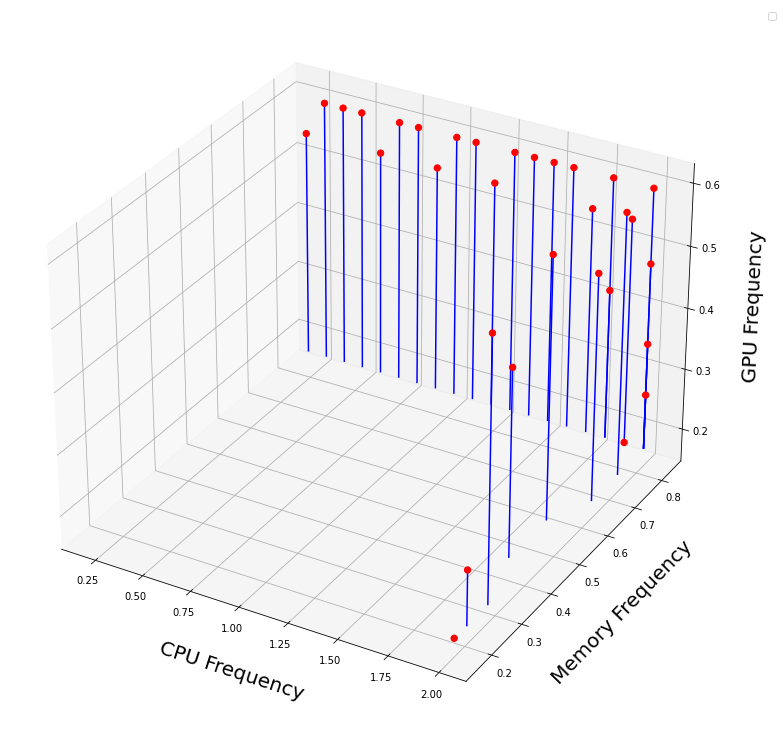

In [31]:
df = pd.DataFrame(data)
data_np=df.to_numpy()
x = data_np[:,0]/1000000.0
y = data_np[:,1]/1000000000.0
z = data_np[:,2]/1000000000.0

z2=np.ones(shape=x.shape)*min(z)

fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
fig.add_axes ( ax )
#scatter
sc = ax.scatter(x, y, z, s=40, marker='o',color='red', alpha=1)

#lines
for i,j,k,h in zip(x,y,z,z2):
    ax.plot([i,i],[j,j],[k,h], color='blue')

ax.set_title('')
ax.set_zlabel('GPU Frequency',labelpad=20,fontsize=20)
ax.set_xlabel('CPU Frequency', labelpad=20,fontsize=20)
ax.set_ylabel('Memory Frequency', labelpad=20,fontsize=20)
plt.legend ( bbox_to_anchor=(1.05, 1), loc=2 )
plt.show()

In [32]:
def plot_set(inp):
    X_list = []
    Y_list = []
    Z_list = []
    for val in inp:
        X_list.append(val[0])
        Y_list.append(val[2])
        Z_list.append(val[1])
    data={'x':X_list,
          'y':Y_list,
          'z':Z_list
         }
    df = pd.DataFrame(data)
    data_np=df.to_numpy()
    x = data_np[:,0]/1000000.0
    y = data_np[:,1]/1000000000.0
    z = data_np[:,2]/1000000000.0
    z2=np.ones(shape=x.shape)*min(z)

    fig = plt.figure(figsize=(30,10))
    ax = Axes3D(fig)
    fig.add_axes ( ax )
    #scatter
    sc = ax.scatter(x, y, z, s=40, marker='o',color='red', alpha=1)

    #lines
    for i,j,k,h in zip(x,y,z,z2):
        ax.plot([i,i],[j,j],[k,h], color='blue')

    ax.set_title('')
    ax.set_zlabel('GPU Frequency',labelpad=20,fontsize=20)
    ax.set_xlabel('CPU Frequency', labelpad=20,fontsize=20)
    ax.set_ylabel('Memory Frequency', labelpad=20,fontsize=20)
    plt.legend ( bbox_to_anchor=(1.05, 1), loc=2 )
    plt.show()
    

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [34]:


def myAnalysis(DATA_PATH=SSSP_DATA_PATH,nu = 1, sortby='E',laxVal = 1,toplot=False):
    my_df = pd.read_csv(DATA_PATH)
    POW = "Power (W)"
    PDP = "PDP_"+str(nu)
    EDP = "EDP_"+str(nu)
    if DATA_PATH == SSSP_DATA_PATH:
        my_df = my_df.drop(my_df.columns[0], axis = 1)
        my_df[POW] = my_df[ACTIVE_POWER]+my_df[IDLE_POWER]
    else:
        my_df = my_df.drop(my_df.columns[0], axis = 1)

    my_df[TOT_SCORE] = (my_df[REAL_TIME_COL].max() / my_df[REAL_TIME_COL])
    my_df[TOT_DELAY] = (my_df[REAL_TIME_COL] / my_df[REAL_TIME_COL].min())

    m_df = my_df[[CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL,TOT_SCORE,POW,TOT_DELAY]].copy()

    m_df[PDP] = pow(m_df[TOT_SCORE],nu)/m_df[POW]
    m_df[EDP] = pow(m_df[TOT_DELAY],nu)*m_df[POW]

    sort_df = pd.DataFrame()

    if sortby == 'E':
        sort_df = m_df.sort_values(by=[EDP], ascending=True)
    else:
        sort_df = m_df.sort_values(by=[PDP], ascending=False)


    cpu_list = sort_df[CPU_FREQ_COL].unique()
    gpu_list = sort_df[GPU_FREQ_COL].unique()
    mem_list = sort_df[MEM_FREQ_COL].unique()
    tot_freq = [cpu_list,gpu_list,mem_list]
    tot_idx = [CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL]
    val_idx = [CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL]
    complete_set = set()
    for i in range(len(tot_idx)):
        for j in range(len(tot_freq[i])):
            lidx = sort_df[sort_df[tot_idx[i]] == tot_freq[i][j]].index
            end = laxVal
            if len(lidx) < laxVal:
                end = len(lidx)
            for idt in range(end):
                val = tuple(m_df.iloc[lidx[idt]][val_idx].to_list())
                complete_set.add(val) 
#     for val in sorted(complete_set):
#         print(val)

    if toplot==True:
        X_list = [0.]
        Y_list = [0.]
        Z_list = [0.]
        for val in complete_set:
            X_list.append(val[0])
            Y_list.append(val[2])
            Z_list.append(val[1])

        data={'x':X_list,
              'y':Y_list,
              'z':Z_list
             }

        df = pd.DataFrame(data)
        data_np=df.to_numpy()
        x = data_np[:,0]/1000000.0
        y = data_np[:,1]/1000000000.0
        z = data_np[:,2]/1000000000.0

        z2=np.ones(shape=x.shape)*min(z)

        fig = plt.figure(figsize=(20,10))
        ax = Axes3D(fig)
        fig.add_axes ( ax )
        #scatter
        sc = ax.scatter(x, y, z, s=40, marker='o',color='red', alpha=1)

        #lines
        for i,j,k,h in zip(x,y,z,z2):
            ax.plot([i,i],[j,j],[k,h], color='blue')

        ax.set_title('')
        ax.set_xlabel('CPU Frequency', labelpad=20,fontsize=20)
        ax.set_ylabel('Memory Frequency', labelpad=20,fontsize=20)
        ax.set_zlabel('GPU Frequency',labelpad=20,fontsize=20)
        plt.legend ( bbox_to_anchor=(1.05, 1), loc=2 )
        plt.show()
    return complete_set

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


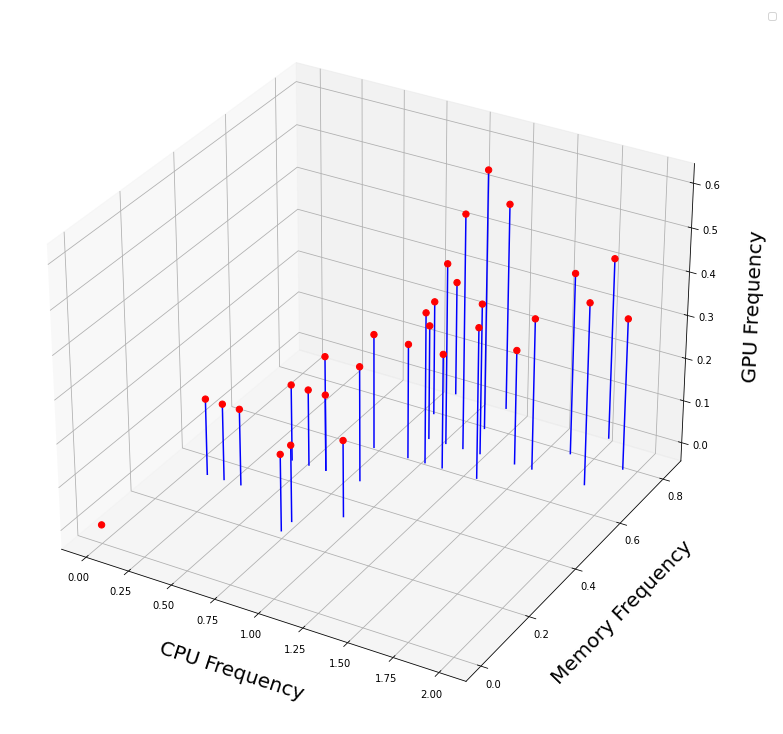

In [35]:
myOut = myAnalysis(SSSP_DATA_PATH,nu = 0.5,sortby='E',laxVal=1,toplot=True)

In [36]:
myNew = set()
for val in myOut:
    if val[0] >= 700000.0 and val[2] > 500000000.0 :
        myNew.add(val)
myNew

{(800000.0, 266000000.0, 543000000.0),
 (900000.0, 266000000.0, 728000000.0),
 (900000.0, 266000000.0, 825000000.0),
 (1000000.0, 266000000.0, 543000000.0),
 (1000000.0, 266000000.0, 633000000.0),
 (1100000.0, 350000000.0, 543000000.0),
 (1100000.0, 420000000.0, 633000000.0),
 (1200000.0, 266000000.0, 543000000.0),
 (1200000.0, 480000000.0, 825000000.0),
 (1200000.0, 543000000.0, 633000000.0),
 (1200000.0, 600000000.0, 728000000.0),
 (1300000.0, 350000000.0, 633000000.0),
 (1400000.0, 350000000.0, 543000000.0),
 (1500000.0, 266000000.0, 633000000.0),
 (1600000.0, 350000000.0, 633000000.0),
 (1700000.0, 420000000.0, 728000000.0),
 (1800000.0, 420000000.0, 825000000.0),
 (1900000.0, 420000000.0, 633000000.0),
 (2000000.0, 350000000.0, 728000000.0)}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


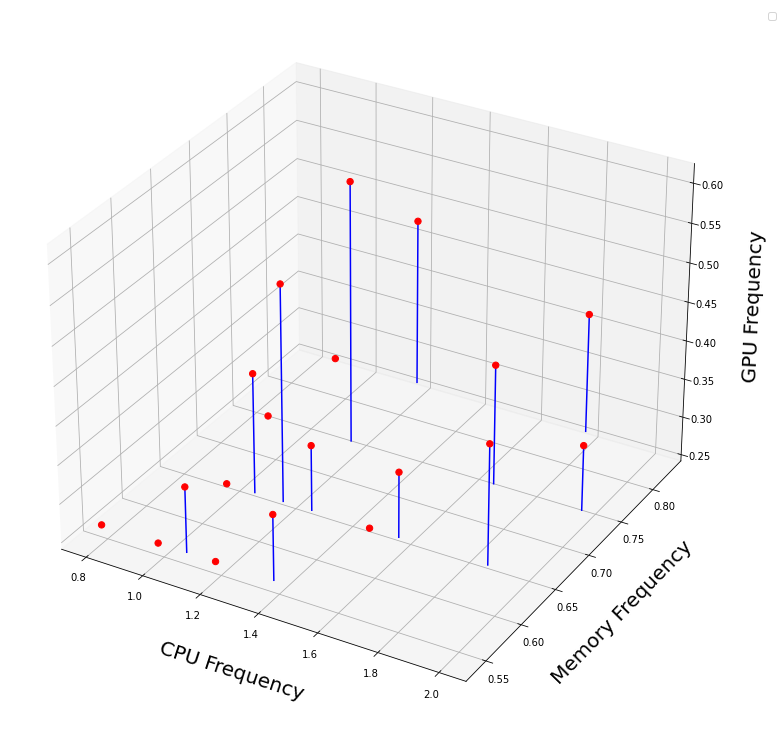

In [37]:
plot_set(myNew)

# Heat Map

In [38]:
def myPlotsHeat(x_list,y_list,comp_set):
    x_list = sorted(x_list)
    y_list = sorted(y_list)
    X, Y = np.meshgrid(x_list,y_list)
    Z = np.zeros((len(y_list),len(x_list)))
    for i in range(len(x_list)):
        for j in range(len(y_list)):
            Z[j,i] = comp_set[x_list[i]][y_list[j]]
    plt.imshow(Z, cmap='hot', interpolation='nearest',origin='lower',aspect=2)
    plt.title('Heat Map of Frequency')
#     plt.xticks(x_list)
#     plt.yticks(y_list)
    plt.colorbar()
    plt.show()
    
    

In [39]:
from matplotlib.patches import Ellipse
def myPlotScatter(comp_set):
    # Assuming a dictionary
    X_list = []
    Y_list = []
    Z_list = []
    for val in comp_set:
#         print(val)
        X_list.append(val[0]/1000000.0)
        Y_list.append(val[2]/1000000000.0)
        Z_list.append(val[3]*4)

    sc = plt.scatter(X_list,Y_list,c=Z_list)
    cbar = plt.colorbar(sc)
    cbar.ax.set_ylabel("PPR")
    plt.xlabel("CPU Frequency(GHz)")
    plt.ylabel("Mem Frequency(GHz)")
    plt.title('')
    ax = plt.gca()
    ax.add_patch(Ellipse((0.99, 0.55,30),width=0.35,height=1.6,angle=-75,
                     edgecolor='b',linestyle='--',
                     facecolor='none',
                     linewidth=1))
    plt.savefig("PPR_CM.svg")
#     plt.show()

In [40]:
def myPlotter(DATA_PATH=SSSP_DATA_PATH,nu = 0.5, sortby='P',laxVal = 1,toplot=False):
    my_df = pd.read_csv(DATA_PATH)
    POW = "Power (W)"
    PDP = "PDP_"+str(nu)
    EDP = "EDP_"+str(nu)
    if DATA_PATH == SSSP_DATA_PATH:
        my_df = my_df.drop(my_df.columns[0], axis = 1)
        my_df[POW] = my_df[ACTIVE_POWER]+my_df[IDLE_POWER]
    else:
        my_df = my_df.drop(my_df.columns[0], axis = 1)

    my_df[TOT_SCORE] = (my_df[REAL_TIME_COL].max() / my_df[REAL_TIME_COL])
    my_df[TOT_DELAY] = (my_df[REAL_TIME_COL] / my_df[REAL_TIME_COL].min())

    m_df = my_df[[CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL,TOT_SCORE,POW,TOT_DELAY]].copy()

    m_df[PDP] = pow(m_df[TOT_SCORE],nu)/m_df[POW]
    m_df[EDP] = pow(m_df[TOT_DELAY],nu)*m_df[POW]

    sort_df = pd.DataFrame()
    MYVAL = EDP
    if sortby == 'E':
        sort_df = m_df.sort_values(by=[EDP], ascending=True)
        MYVAL = EDP
    else:
        sort_df = m_df.sort_values(by=[PDP], ascending=False)
        MYVAL = PDP


    cpu_list = sort_df[CPU_FREQ_COL].unique()
    gpu_list = sort_df[GPU_FREQ_COL].unique()
    mem_list = sort_df[MEM_FREQ_COL].unique()
    tot_freq = [cpu_list,mem_list]
    tot_idx = [CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL]
    val_idx = [CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL,MYVAL]
    comp_idx=[CPU_FREQ_COL,MEM_FREQ_COL]
#     complete_set = {} This is for heatmap
    complete_set = set()
    
    for i in range(len(cpu_list)):
        for j in range(len(mem_list)):
            midx = sort_df[ (sort_df[CPU_FREQ_COL] == cpu_list[i])].index.to_list()
#             print(len(midx))
            gidx = sort_df[ (sort_df[MEM_FREQ_COL] == mem_list[j])].index.to_list()
            lidx = sort_df[ (sort_df[CPU_FREQ_COL] == cpu_list[i]) & (sort_df[MEM_FREQ_COL] == mem_list[j])  ].index[0]
            gpuval = gidx.index(lidx)
            memval = midx.index(lidx)
#             print(gpuval,memval)
            dfVal = m_df.iloc[lidx][val_idx].to_list()
            dfVal = list(dfVal)
#             dfVal = dfVal.append(min(gpuval,memval))
#             dfVal.append(10-min(min(gpuval,memval),10))
            val = tuple(dfVal)
#             print(val)
            complete_set.add(val)
#             print(val) Commented code for heatmap
#             if cpu_list[i] not in complete_set:
#                 complete_set[cpu_list[i]] = {}
#             complete_set[cpu_list[i]][mem_list[j]] = val[3]
        
    
    


    if toplot==True:
        myPlotScatter(complete_set)
#         myPlotsHeat(cpu_list,mem_list,complete_set)
        
        
#     return 

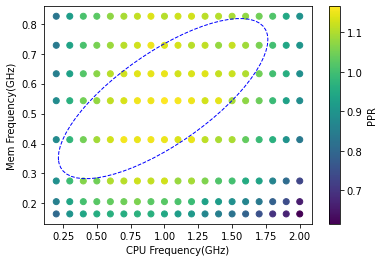

In [41]:
myPlotter(nu = 0.5, sortby='P',toplot=True)

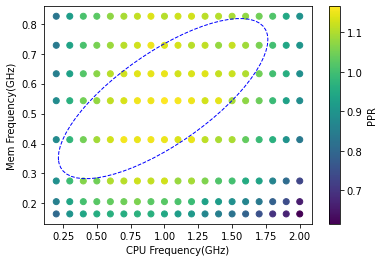

In [42]:
myPlotter(nu = 0.5, sortby='P',toplot=True)

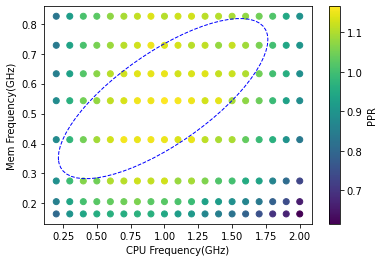

In [43]:
myPlotter(nu = 0.5, sortby='P',toplot=True)

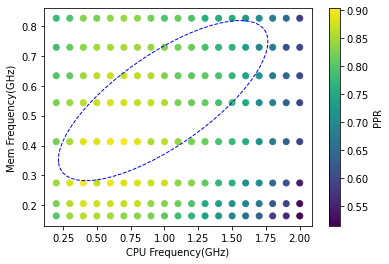

In [44]:
myPlotter(nu = 0.25, sortby='P',toplot=True)

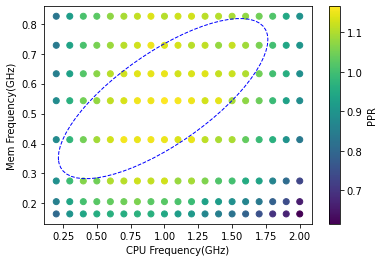

In [45]:
myPlotter(nu = 0.5, sortby='P',toplot=True)

In [46]:
# myPlotter(nu = 0.5, sortby='P',toplot=True)

In [47]:
import seaborn as sns

In [48]:
flight = sns.load_dataset('flights') 

In [49]:
flight

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [50]:
flights_df = flight.pivot('month', 'year', 'passengers') 

In [51]:
flights_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


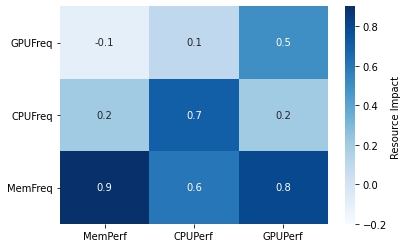

In [52]:
import pandas as pd
import seaborn as sb
# Create a dataFrame using dictionary
np.bool = np.bool_ 
data =pd.DataFrame([[-0.1,0.1,0.5],[0.2,0.7,0.2],[0.9,0.6,0.8]])
xtick = ['MemPerf','CPUPerf','GPUPerf']
ytick = ['GPUFreq','CPUFreq','MemFreq']
data.columns = ['MemPerf', 'CPUPerf', 'GPUPerf']
data.index = ['GPUFreq', 'CPUFreq', 'MemFreq']
sb.heatmap(data,cmap="Blues", annot=True,vmin=-0.2,vmax=0.9,cbar_kws={'label': 'Resource Impact '})
plt.yticks(rotation=0) 

plt.show()

# Dominant Resource

In [53]:
util_df = pd.read_csv('./UtilCopy.csv')

In [54]:
xval = util_df.index/10
xval = xval - 7

In [55]:
util_df.columns

Index(['Time', 'sCPU', 'cCost', 'sFreq', 'bCPU', 'bUtil', 'bFreq', 'Mem',
       'mCost', 'mFreq', 'GPU', 'gCost', 'gFreq'],
      dtype='object')

In [56]:
util_df['gCost'] = util_df['gCost']*1.25
util_df['mCost'] = 0.15 + (util_df['mCost']-0.15)/1.1
util_df['Time(s)'] = xval

In [57]:
# util_df['cCost'] = util_df['cCost']/1.3
cpu = util_df.cCost.to_numpy()
gpu = util_df.gCost.to_numpy()
mem = util_df.mCost.to_numpy()
len(mem)

331

In [58]:
# util_df['gCost'] = util_df['gCost']*1.1
# util_df['mCost'] = 0.15 + (util_df['mCost']-0.15)/1.1
# util_df['Time(s)'] = xval

In [59]:
count = [0,0,0]
for val in zip(cpu,gpu,mem):
    if val[0] == max(val):
        count[0] += 1
    elif val[1] == max(val):
        count[1] += 1
    else:
        count[2] += 1
    

In [60]:
np.array(count)/331

array([0.51963746, 0.32326284, 0.1570997 ])

In [61]:
util_df

,Time,sCPU,cCost,sFreq,bCPU,bUtil,bFreq,Mem,mCost,mFreq,GPU,gCost,gFreq,Time(s)
0,1.700326e+09,sCPU,14,1400000,bCPU,0,2000000,Mem,13.650000,825000000,GPU,0.0,600000000,-7.0
1,1.700326e+09,sCPU,5,1400000,bCPU,0,2000000,Mem,13.650000,825000000,GPU,0.0,600000000,-6.9
2,1.700326e+09,sCPU,15,1400000,bCPU,0,2000000,Mem,14.559091,825000000,GPU,0.0,600000000,-6.8
3,1.700326e+09,sCPU,3,1400000,bCPU,0,2000000,Mem,13.650000,825000000,GPU,0.0,600000000,-6.7
4,1.700326e+09,sCPU,9,1400000,bCPU,0,2000000,Mem,14.559091,825000000,GPU,0.0,600000000,-6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,1.700326e+09,sCPU,100,1400000,bCPU,0,2000000,Mem,21.831818,825000000,GPU,0.0,600000000,25.6
327,1.700326e+09,sCPU,7,1400000,bCPU,0,2000000,Mem,20.922727,825000000,GPU,0.0,600000000,25.7
328,1.700326e+09,sCPU,7,1400000,bCPU,0,2000000,Mem,23.650000,825000000,GPU,0.0,600000000,25.8
329,1.700326e+09,sCPU,4,1400000,bCPU,0,2000000,Mem,20.922727,825000000,GPU,0.0,600000000,25.9


Text(0, 0.5, 'Cost')

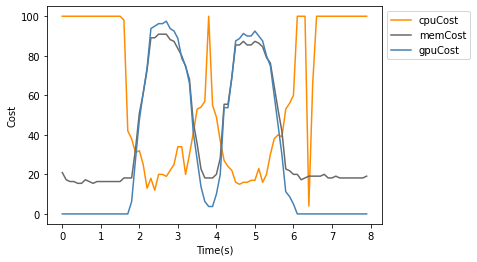

In [62]:
# util_df.iloc[70:150][['cCost','mCost','gCost']].plot()
# plt.plot(xval[70:150], util_df.iloc[70:150][['cCost','mCost','gCost']])
# plt.rcParams["figure.figsize"] = [15, 3]
plt.plot(xval[70:150],util_df.iloc[70:150]['cCost'], color='darkorange', label='cpuCost')
plt.plot(xval[70:150],util_df.iloc[70:150]['mCost'], color='dimgrey', label='memCost')
plt.plot(xval[70:150],util_df.iloc[70:150]['gCost'], color='steelblue', label='gpuCost')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Time(s)')
plt.ylabel('Cost')

In [63]:
cpu = util_df.iloc[70:150]['cCost']
gpu = util_df.iloc[70:150]['gCost']
mem = util_df.iloc[70:150]['mCost']
cpu_new = []
gpu_new = []
mem_new = []
for val in zip(cpu,gpu,mem):
    cpu_new.append(0.7*val[0] + 0.2*val[1]+ 0.2*val[2])
    mem_new.append(0.7*val[2]+ 0.5*val[0] + 0.5*val[1])
    gpu_new.append(-0.1*val[2] + 0.1*val[0]+ 0.9*val[1])
#     newVal = (cpu_new,gpu_new,mem_new)
#     if val[0] == max(val):
#         count[0] += 1
#     elif val[1] == max(val):
#         count[1] += 1
#     elif val[2] == max(val):
#         count[2] += 1
    
#     if newVal[0] == max(newVal):
#         out_count[0] += 1
#     elif newVal[1] == max(newVal):
#         out_count[1] += 1
#     elif newVal[2] == max(newVal):
#         out_count[2] += 1


Text(0, 0.5, 'Utility')

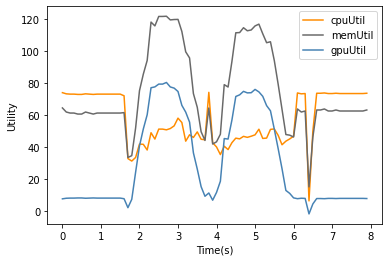

In [64]:
# plt.rcParams["figure.figsize"] = [15, 3]
plt.plot(xval[70:150],cpu_new, color='darkorange', label='cpuUtil')
plt.plot(xval[70:150],mem_new, color='dimgrey', label='memUtil')
plt.plot(xval[70:150],gpu_new, color='steelblue', label='gpuUtil')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Time(s)')
plt.ylabel('Utility')

Text(0, 0.5, 'Cost')

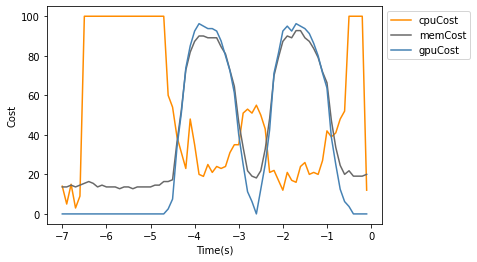

In [65]:
# plt.rcParams["figure.figsize"] = [15, 3]
plt.plot(xval[:70],util_df.iloc[0:70]['cCost'], color='darkorange', label='cpuCost')
plt.plot(xval[0:70],util_df.iloc[0:70]['mCost'], color='dimgrey', label='memCost')
plt.plot(xval[0:70],util_df.iloc[0:70]['gCost'], color='steelblue', label='gpuCost')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Time(s)')
plt.ylabel('Cost')

### Data Read Plot and total

In [66]:
DATA_READ = './UtilTRNS.csv'
dom_df = pd.read_csv(DATA_READ)
dom_df

,Time,sCPU,cCost,sFreq,bCPU,bUtil,bFreq,Mem,mCost,mFreq,GPU,gCost,gFreq
0,1.700423e+09,sCPU,0,1400000,bCPU,0,2000000,Mem,0,825000000,GPU,0,600000000
1,1.700423e+09,sCPU,30,1400000,bCPU,0,2000000,Mem,1,825000000,GPU,0,600000000
2,1.700423e+09,sCPU,32,1400000,bCPU,0,2000000,Mem,0,825000000,GPU,0,600000000
3,1.700423e+09,sCPU,25,1400000,bCPU,0,2000000,Mem,1,825000000,GPU,0,600000000
4,1.700423e+09,sCPU,70,1400000,bCPU,0,2000000,Mem,3,825000000,GPU,0,600000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,1.700423e+09,sCPU,5,1400000,bCPU,0,2000000,Mem,3,825000000,GPU,0,600000000
1493,1.700423e+09,sCPU,18,1400000,bCPU,0,2000000,Mem,1,825000000,GPU,0,600000000
1494,1.700423e+09,sCPU,1,1400000,bCPU,0,2000000,Mem,0,825000000,GPU,0,600000000
1495,1.700423e+09,sCPU,1,1400000,bCPU,0,2000000,Mem,0,825000000,GPU,0,600000000


In [67]:
dom_df['gCost'] = dom_df['gCost']/1.1
dom_df['mCost'] = dom_df['mCost']
# dom_df['Time(s)'] = xval

In [68]:
cpu = dom_df.iloc[70:150]['cCost']
gpu = dom_df.iloc[70:150]['gCost']
mem = dom_df.iloc[70:150]['mCost']
cpu_new = []
gpu_new = []
mem_new = []
for val in zip(cpu,gpu,mem):
    cpu_new.append(0.7*val[0] + 0.2*val[1]+ 0.2*val[2])
    mem_new.append(0.9*val[2]+ 0.5*val[0] + 0.6*val[1])
    gpu_new.append(-0.1*val[2] + 0.1*val[0]+ 0.9*val[1])

Text(0, 0.5, 'Utility')

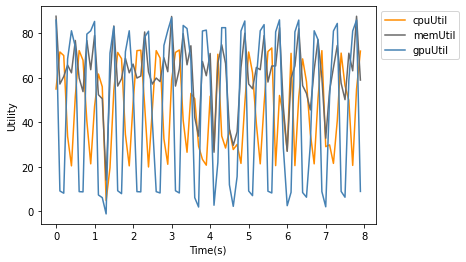

In [69]:
plt.plot(xval[70:150],cpu_new, color='darkorange', label='cpuUtil')
plt.plot(xval[70:150],mem_new, color='dimgrey', label='memUtil')
plt.plot(xval[70:150],gpu_new, color='steelblue', label='gpuUtil')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Time(s)')
plt.ylabel('Utility')

Text(0, 0.5, 'Cost')

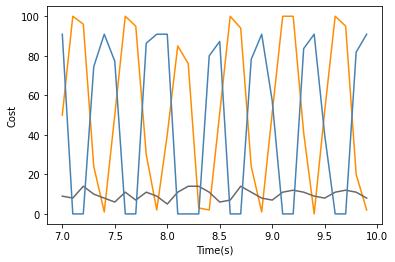

In [70]:
# plt.rcParams["figure.figsize"] = [15, 3]
xval = dom_df.index/10
# plt.rcParams["figure.figsize"] = [15, 3]
plt.plot(xval[70:100],dom_df.iloc[70:100]['cCost'], color='darkorange', label='cpuCost')
plt.plot(xval[70:100],dom_df.iloc[70:100]['mCost'], color='dimgrey', label='memCost')
plt.plot(xval[70:100],dom_df.iloc[70:100]['gCost'], color='steelblue', label='gpuCost')
# plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Time(s)')
plt.ylabel('Cost')
# dom_df.iloc[40:100][['cCost','mCost','gCost']].plot()
# plt.legend(bbox_to_anchor=(1.0, 1.0))
# plt.xlabel('Time(s)')
# plt.ylabel('Cost')

In [71]:
dom_df['gCost'] = dom_df['gCost']

In [72]:
cpu = dom_df.cCost.to_numpy()
gpu = dom_df.gCost.to_numpy()
mem = dom_df.mCost.to_numpy()
count = [0,0,0]
out_count = [0,0,0]
for val in zip(cpu,gpu,mem):
    cpu_new =  0.7*val[0] + 0.2*val[1]+ 0.2*val[2]
    mem_new = 0.7*val[2]+ 0.5*val[0] + 0.7*val[1]
    gpu_new = -0.1*val[2] + 0.1*val[0]+ 0.9*val[1]
    newVal = (cpu_new,gpu_new,mem_new)
    if val[0] == max(val):
        count[0] += 1
    elif val[1] == max(val):
        count[1] += 1
    elif val[2] == max(val):
        count[2] += 1
    
    if newVal[0] == max(newVal):
        out_count[0] += 1
    elif newVal[1] == max(newVal):
        out_count[1] += 1
    elif newVal[2] == max(newVal):
        out_count[2] += 1
        
        
print("OLD:", np.array(count)/len(cpu), "NEW:",np.array(out_count)/len(cpu))

OLD: [0.53373413 0.44355377 0.02271209] NEW: [0.41616566 0.2004008  0.38343353]


In [73]:
# OLD: [0.52237809 0.45490982 0.02271209] NEW: [0.41349365 0.2251169  0.36138945]

# Result Plot

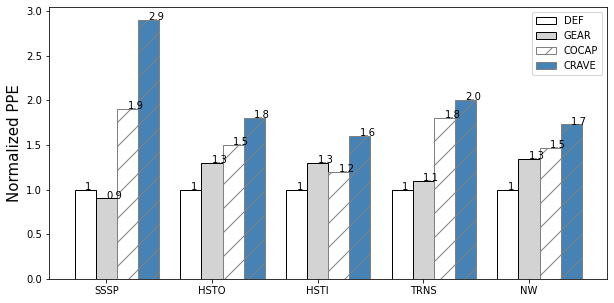

In [74]:
import numpy as np 
import matplotlib.pyplot as plt 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i],round(y[i],1))
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(10, 5)) 
# set height of bar 
DEF = [1, 1, 1, 1,1] 
GEAR = [0.9, 1.3, 1.3, 1.1,1.34] 
COCAP = [1.9, 1.5, 1.2, 1.8,1.47]
CRAVE = [2.9,1.8,1.6,2.0,1.73]
# IT = [0.51963746]
# ECE = [0.32326284]
# CSE = [0.1570997]
# Set position of bar on X axis 
br1 = np.arange(len(DEF)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
 
# Make the plot
plt.bar(br1, DEF, color ='white', width = barWidth, 
        edgecolor ='black', label ='DEF')
addlabels(br1, DEF)

plt.bar(br2, GEAR, color ='lightgrey', width = barWidth, 
        edgecolor ='black', label ='GEAR')

addlabels(br2, GEAR)
plt.bar(br3, COCAP, color ='white', width = barWidth, 
        edgecolor ='grey', label ='COCAP',hatch= "/") 
addlabels(br3, COCAP)
plt.bar(br4, CRAVE, color ='steelblue', width = barWidth, 
        edgecolor ='grey', label ='CRAVE',hatch= "/") 
addlabels(br4, CRAVE)


    
    
    
# Adding Xticks 
# plt.xlabel('Workload', fontweight ='bold', fontsize = 15) 
plt.ylabel('Normalized PPE', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(DEF))], 
        ['SSSP', 'HSTO', 'HSTI', 'TRNS','NW'])
plt.legend()
plt.savefig("HETRES.svg")
 

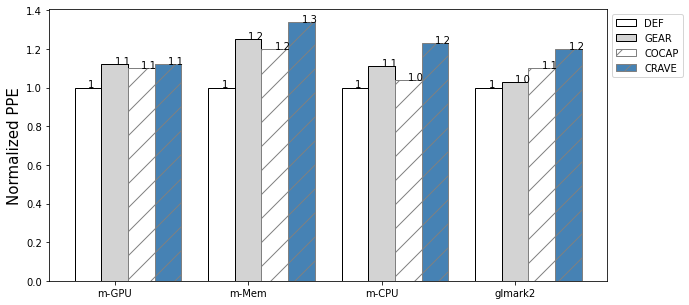

In [84]:
import numpy as np 
import matplotlib.pyplot as plt 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i],round(y[i],1))
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(10, 5)) 
# set height of bar 
DEF = [1, 1, 1, 1] 
GEAR = [1.12, 1.25, 1.11, 1.03] 
COCAP = [1.10, 1.2, 1.04, 1.1]
CRAVE = [1.12,1.34,1.23,1.2]
# IT = [0.51963746]
# ECE = [0.32326284]
# CSE = [0.1570997]
# Set position of bar on X axis 
br1 = np.arange(len(DEF)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
 
# Make the plot
plt.bar(br1, DEF, color ='white', width = barWidth, 
        edgecolor ='black', label ='DEF')
addlabels(br1, DEF)

plt.bar(br2, GEAR, color ='lightgrey', width = barWidth, 
        edgecolor ='black', label ='GEAR')

addlabels(br2, GEAR)
plt.bar(br3, COCAP, color ='white', width = barWidth, 
        edgecolor ='grey', label ='COCAP',hatch= "/") 
addlabels(br3, COCAP)
plt.bar(br4, CRAVE, color ='steelblue', width = barWidth, 
        edgecolor ='grey', label ='CRAVE',hatch= "/") 
addlabels(br4, CRAVE)


    
    
    
# Adding Xticks 
# plt.xlabel('Workload', fontweight ='bold', fontsize = 15) 
plt.ylabel('Normalized PPE', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(DEF))], 
        ['m-GPU', 'm-Mem', 'm-CPU', 'glmark2'])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("PPE_mbench.svg")
# plt.show() 

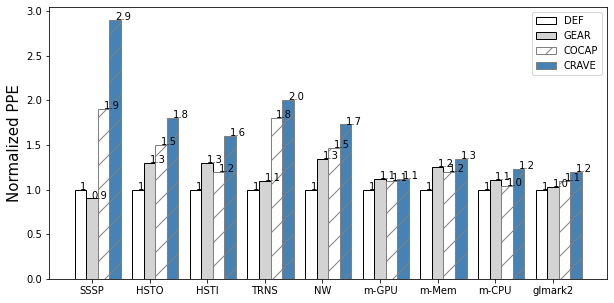

In [85]:
import numpy as np 
import matplotlib.pyplot as plt 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i],round(y[i],1))
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(10, 5)) 
# set height of bar 
DEF = [1, 1, 1, 1,1,1, 1, 1, 1] 
GEAR = [0.9, 1.3, 1.3, 1.1,1.34,1.12, 1.25, 1.11, 1.03] 
COCAP = [1.9, 1.5, 1.2, 1.8,1.47,1.10, 1.2, 1.04, 1.1]
CRAVE = [2.9,1.8,1.6,2.0,1.73,1.12,1.34,1.23,1.2]
# IT = [0.51963746]
# ECE = [0.32326284]
# CSE = [0.1570997]
# Set position of bar on X axis 
br1 = np.arange(len(DEF)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
 
# Make the plot
plt.bar(br1, DEF, color ='white', width = barWidth, 
        edgecolor ='black', label ='DEF')
addlabels(br1, DEF)

plt.bar(br2, GEAR, color ='lightgrey', width = barWidth, 
        edgecolor ='black', label ='GEAR')

addlabels(br2, GEAR)
plt.bar(br3, COCAP, color ='white', width = barWidth, 
        edgecolor ='grey', label ='COCAP',hatch= "/") 
addlabels(br3, COCAP)
plt.bar(br4, CRAVE, color ='steelblue', width = barWidth, 
        edgecolor ='grey', label ='CRAVE',hatch= "/") 
addlabels(br4, CRAVE)


    
    
    
# Adding Xticks 
# plt.xlabel('Workload', fontweight ='bold', fontsize = 15) 
plt.ylabel('Normalized PPE', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(DEF))], 
        ['SSSP', 'HSTO', 'HSTI', 'TRNS','NW','m-GPU', 'm-Mem', 'm-CPU', 'glmark2'])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("HETRES_Comb.svg")

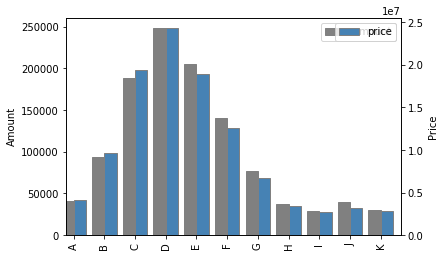

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO

s = StringIO("""     amount     price
A     40929   4066443
B     93904   9611272
C    188349  19360005
D    248438  24335536
E    205622  18888604
F    140173  12580900
G     76243   6751731
H     36859   3418329
I     29304   2758928
J     39768   3201269
K     30350   2867059""")

df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

lns1 = df.amount.plot(kind='bar', color='grey',edgecolor ='grey', ax=ax, width=width, position=1,label = 'amount')
lns2 = df.price.plot(kind='bar', color='steelblue',edgecolor ='grey', ax=ax2, width=width, position=0,label='price')
# lns = lns1+lns2
# labs = [l.get_label() for l in lns]
# ax.legend(lns, labs, loc=0)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')
ax.legend(loc=0)
ax2.legend(loc=1)
plt.show()

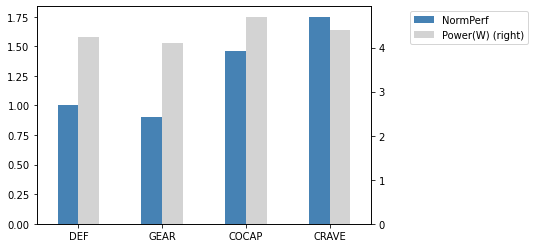

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     NormPerf     Power(W)
DEF     1   4.25
GEAR     0.9   4.1
COCAP    1.46  4.7
CRAVE    1.75 4.4""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

ax = df.plot( kind= 'bar' , secondary_y= 'Power(W)' , rot= 0 ,color=['steelblue','lightgrey'])
ax.get_legend().set_bbox_to_anchor((1.1, 1))
# ax.legend(["Perf", "Pow"])
plt.show()

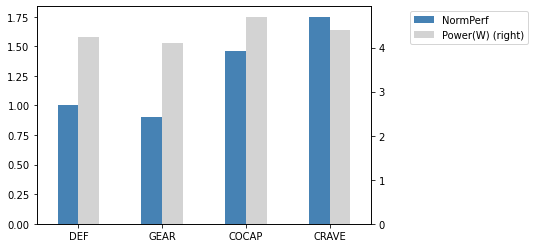

In [77]:
#Prev Work
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     NormPerf     Power(W)
DEF     1   4.25
GEAR     0.9   4.1
COCAP    1.46  4.7
CRAVE    1.75 4.4""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

ax = df.plot( kind= 'bar' , secondary_y= 'Power(W)' , rot= 0 ,color=['steelblue','lightgrey'])
ax.get_legend().set_bbox_to_anchor((1.1, 1))
# ax.legend(["Perf", "Pow"])
plt.show()

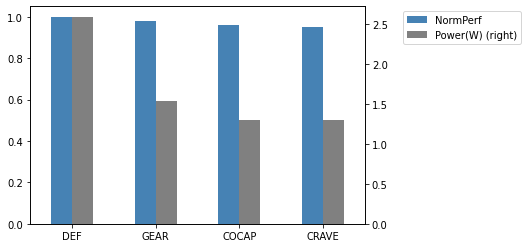

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     NormPerf     Power(W)
DEF     1   2.59
GEAR     0.98   1.54
COCAP    0.96  1.3
CRAVE    0.95 1.3""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

ax = df.plot( kind= 'bar' , secondary_y= 'Power(W)' , rot= 0 ,color=['steelblue','grey'])
ax.get_legend().set_bbox_to_anchor((1.1, 1))
# ax.legend(["Perf", "Pow"])
plt.show()

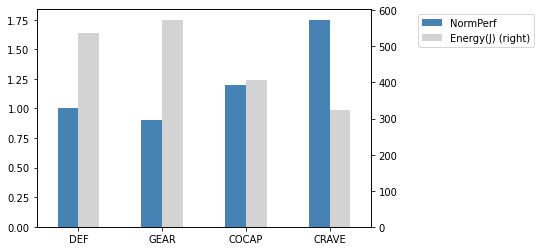

In [79]:
#SSSP
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     NormPerf     Energy(J)
DEF     1   537
GEAR     0.9   574
COCAP    1.2  406
CRAVE    1.75 324""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

ax = df.plot( kind= 'bar' , secondary_y= 'Energy(J)' , rot= 0 ,color=['steelblue','lightgrey'])
ax.get_legend().set_bbox_to_anchor((1.5, 1))
# ax.legend(["Perf", "Pow"])
plt.show()

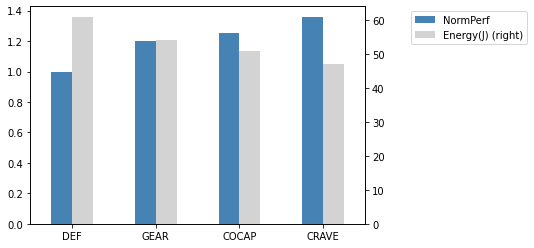

In [80]:
#NW
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     NormPerf     Energy(J)
DEF     1   61
GEAR     1.2   54
COCAP    1.25  51
CRAVE    1.36 47""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

ax = df.plot( kind= 'bar' , secondary_y= 'Energy(J)' , rot= 0 ,color=['steelblue','lightgrey'])
ax.get_legend().set_bbox_to_anchor((1.5, 1))
# ax.legend(["Perf", "Pow"])
plt.show()

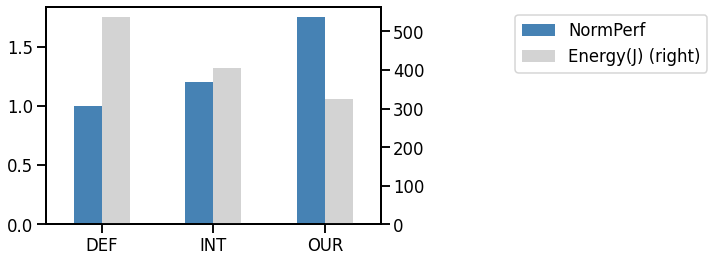

In [91]:
#SSSP
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     NormPerf     Energy(J)
DEF     1   537
INT    1.2  406
OUR    1.75 324""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

ax = df.plot( kind= 'bar' , secondary_y= 'Energy(J)' , rot= 0 ,color=['steelblue','lightgrey'])
ax.get_legend().set_bbox_to_anchor((2, 1))
# ax.legend(["Perf", "Pow"])
plt.show()

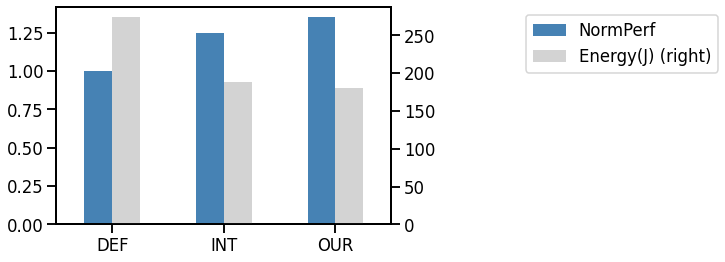

In [92]:
#TRNS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     NormPerf     Energy(J)
DEF     1   274
INT    1.25  188
OUR    1.35 180""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

ax = df.plot( kind= 'bar' , secondary_y= 'Energy(J)' , rot= 0 ,color=['steelblue','lightgrey'])
ax.get_legend().set_bbox_to_anchor((2, 1))
# ax.legend(["Perf", "Pow"])
plt.show()

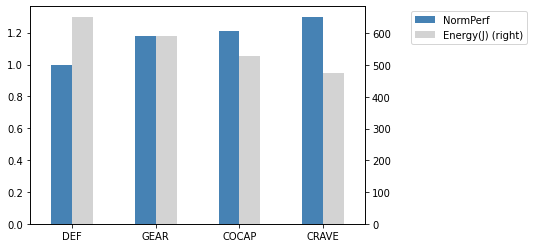

In [83]:
#HSTO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     NormPerf     Energy(J)
DEF     1   652
GEAR     1.18   591
COCAP    1.21  528
CRAVE    1.3 476""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

ax = df.plot( kind= 'bar' , secondary_y= 'Energy(J)' , rot= 0 ,color=['steelblue','lightgrey'])
ax.get_legend().set_bbox_to_anchor((1.5, 1))
# ax.legend(["Perf", "Pow"])
plt.show()

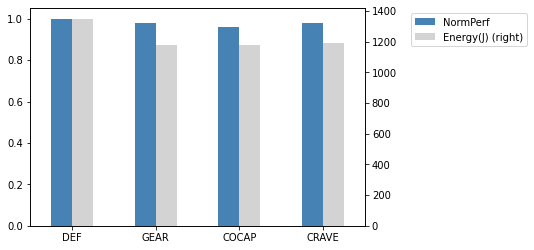

In [84]:
#m-GPU
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     NormPerf     Energy(J)
DEF     1   1349
GEAR     0.98   1176
COCAP    0.96  1175
CRAVE    0.98 1191""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

ax = df.plot( kind= 'bar' , secondary_y= 'Energy(J)' , rot= 0 ,color=['steelblue','lightgrey'])
ax.get_legend().set_bbox_to_anchor((1.5, 1))
# ax.legend(["Perf", "Pow"])
plt.show()

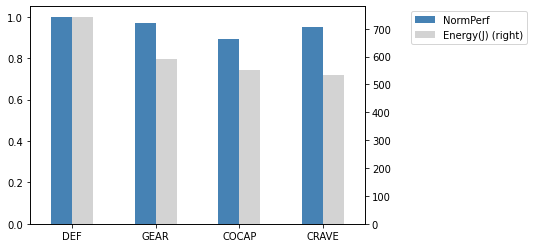

In [85]:
#m-Mem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     NormPerf     Energy(J)
DEF     1   743
GEAR     0.97   590
COCAP    0.89  551
CRAVE    0.95 535""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

ax = df.plot( kind= 'bar' , secondary_y= 'Energy(J)' , rot= 0 ,color=['steelblue','lightgrey'])
ax.get_legend().set_bbox_to_anchor((1.5, 1))
# ax.legend(["Perf", "Pow"])
plt.show()

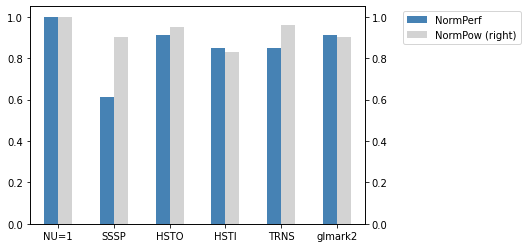

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""     NormPerf     NormPow
NU=1     1.0   1.0
SSSP     0.61   0.9
HSTO     0.91   0.95
HSTI    0.85  0.83
TRNS    0.85 0.96
glmark2 0.91 0.9""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

ax = df.plot( kind= 'bar' , secondary_y= 'NormPow' , rot= 0 ,color=['steelblue','lightgrey'])
ax.get_legend().set_bbox_to_anchor((1.1, 1))
# ax.legend(["Perf", "Pow"])
plt.show()

# Stacked Plot

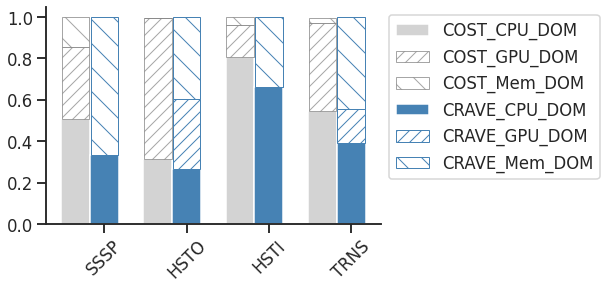

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# make up some fake data
pos_mut_pcts = np.array([0.50755287, 0.31325301, 0.80722892, 0.54442218])
pos_cna_pcts = np.array([0.34743202, 0.68072289, 0.15662651, 0.42818971])
pos_both_pcts = np.array([0.14501511, 0, 0.03614458,0.02271209])
neg_mut_pcts = np.array([0.33232628, 0.26506024, 0.6626506, 0.39211757])
neg_cna_pcts = np.array([0, 0.3373494, 0.0, 0.16366065])
neg_both_pcts = np.array([0.66767372, 0.39759036, 0.3373494, 0.44422178])
genes = ['SSSP', 'HSTO', 'HSTI', 'TRNS']

with sns.axes_style("white"):
    sns.set_style("ticks")
    sns.set_context("talk")
    
    # plot details
    bar_width = 0.35
    epsilon = .015
    line_width = 1
    opacity = 0.7
    pos_bar_positions = np.arange(len(pos_mut_pcts))
    neg_bar_positions = pos_bar_positions + bar_width

    # make bar plots
    hpv_pos_mut_bar = plt.bar(pos_bar_positions, pos_mut_pcts, bar_width,
                              color='lightgrey',
                              label='COST_CPU_DOM')
    hpv_pos_cna_bar = plt.bar(pos_bar_positions, pos_cna_pcts, bar_width-epsilon,
                              bottom=pos_mut_pcts,
                              alpha=opacity,
                              color='white',
                              edgecolor='grey',
                              linewidth=line_width,
                              hatch='//',
                              label='COST_GPU_DOM')
    hpv_pos_both_bar = plt.bar(pos_bar_positions, pos_both_pcts, bar_width-epsilon,
                               bottom=pos_cna_pcts+pos_mut_pcts,
                               alpha=opacity,
                               color='white',
                               edgecolor='grey',
                               linewidth=line_width,
                               hatch='\\',
                               label='COST_Mem_DOM')
    hpv_neg_mut_bar = plt.bar(neg_bar_positions, neg_mut_pcts, bar_width,
                              color='steelblue',
                              label='CRAVE_CPU_DOM')
    hpv_neg_cna_bar = plt.bar(neg_bar_positions, neg_cna_pcts, bar_width-epsilon,
                              bottom=neg_mut_pcts,
                              color="white",
                              hatch='//',
                              edgecolor='steelblue',
                              ecolor="steelblue",
                              linewidth=line_width,
                              label='CRAVE_GPU_DOM')
    hpv_neg_both_bar = plt.bar(neg_bar_positions, neg_both_pcts, bar_width-epsilon,
                               bottom=neg_cna_pcts+neg_mut_pcts,
                               color="white",
                               hatch='\\',
                               edgecolor='steelblue',
                               ecolor="#0000DD",
                               linewidth=line_width,
                               label='CRAVE_Mem_DOM')
    plt.xticks(neg_bar_positions, genes, rotation=45)
#     plt.ylabel('Dominant Resource')
#     plt.legend(loc='best')
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    sns.despine()

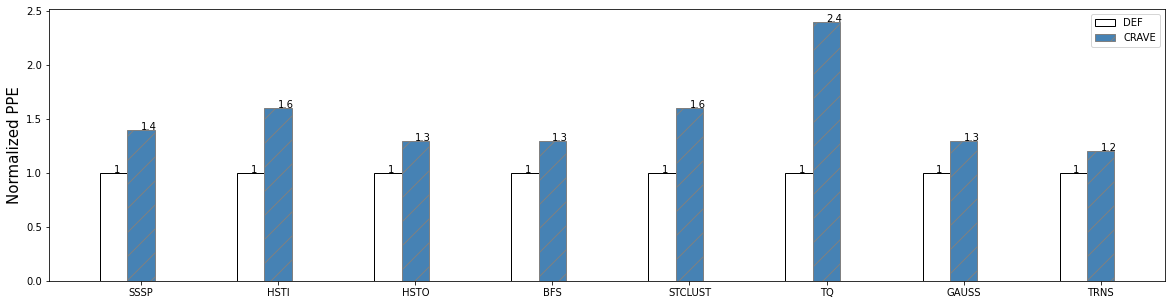

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i],round(y[i],1))
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(20, 5)) 
# set height of bar 
DEF = [1, 1, 1, 1, 1, 1, 1, 1] 
# GEAR = [1.12, 1.25, 1.11, 1.03] 
# COCAP = [1.10, 1.2, 1.04, 1.1]
CRAVE = [1.4,1.6,1.3,1.3, 1.6, 2.4, 1.3, 1.2]
# IT = [0.51963746]
# ECE = [0.32326284]
# CSE = [0.1570997]
# Set position of bar on X axis 
br1 = np.arange(len(DEF)) 
# br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, DEF, color ='white', width = barWidth, 
        edgecolor ='black', label ='DEF')
addlabels(br1, DEF)

# plt.bar(br2, GEAR, color ='lightgrey', width = barWidth, 
#         edgecolor ='black', label ='GEAR')

# addlabels(br2, GEAR)
# plt.bar(br3, COCAP, color ='white', width = barWidth, 
#         edgecolor ='grey', label ='COCAP',hatch= "/") 
# addlabels(br3, COCAP)
plt.bar(br4, CRAVE, color ='steelblue', width = barWidth, 
        edgecolor ='grey', label ='CRAVE',hatch= "/") 
addlabels(br4, CRAVE)


    
    
    
# Adding Xticks 
# plt.xlabel('Workload', fontweight ='bold', fontsize = 15) 
plt.ylabel('Normalized PPE', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(DEF))], 
        ['SSSP', 'HSTI', 'HSTO', 'BFS', 'STCLUST', 'TQ', 'GAUSS', 'TRNS'])
plt.legend()
plt.savefig("PPE_TX2.svg")
plt.show() 

In [3]:
br1

array([0, 1, 2, 3, 4, 5, 6, 7])